ESERCIZIO IN AULA DEL 9/04, SECONDA PARTE DEGLI ES DI CAMPIONAMENTO

SECONDO METODO PER CAMPIONARE: SI USA IL METODO DI MONTE CARLO PER REIEZIONE

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [114]:
# Read the Omega_m - Chi2 Table
omega_m_values, chi2_values = np.load("chi2_values.npy")

In [115]:
posterior = np.exp(-0.5 * chi2_values)

In [116]:
#interpolate the posterior
interp_posterior = interp1d(omega_m_values, posterior, kind="cubic") #ho creato funzione che può interpolare la quantotà, ovv la f(x)

In [117]:
#q(x) deve sovrastare tutta la funzione, altrimenti il rapporto tra f e q può essere maggiore di 1-->non campionerebbe bene 
#so che il picco è in 4*10^-4 (non normalizzata)--> q(x)=K  con K=1.01*max(f(x))
K=1.01*np.max(posterior)
#K=2*1.01*np.max(posterior)   #prova fatta dopo, alla cella 97-98 (markdown)

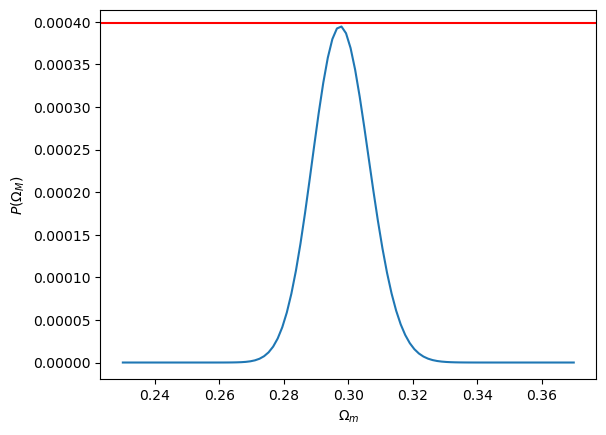

In [118]:
plt.plot(omega_m_values, posterior) 
plt.axhline(K, color="red")
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")
plt.show()

In [119]:
#posso generae un numero grande a piacere di omega_m e poi toglerli, ma non so quanti numeri avrò (è un for), il secondo metodo (while) è fino a che non ho un numero scelto di valori
#faccio il primo
n_attempts = 10000
omega_m_try = np.random.uniform(0.23, 0.37, n_attempts)
U=np.random.uniform(0, 1, n_attempts)

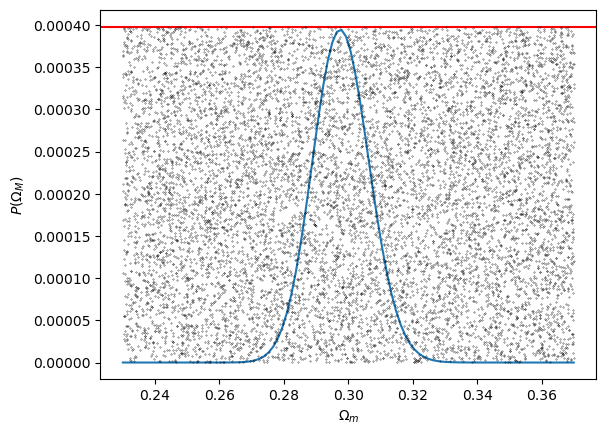

In [120]:
plt.plot(omega_m_values, posterior)
plt.axhline(K, color="red")
plt.plot(omega_m_try, U*K, ".",ms="0.5",color="k")
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")
plt.show()

In [121]:
ff=interp_posterior(omega_m_try)

In [122]:
#condizione di accettazione
acc=ff>U*K

In [123]:
acc  #ff è della stessa dim di m_try e quindi di u, si restituisce lista grande quanto loro 3 in cui dice per quali è vero

array([False,  True, False, ..., False,  True, False], shape=(10000,))

In [124]:
sum(acc)  #mi dice per quanti oggetti vale

np.int64(1541)

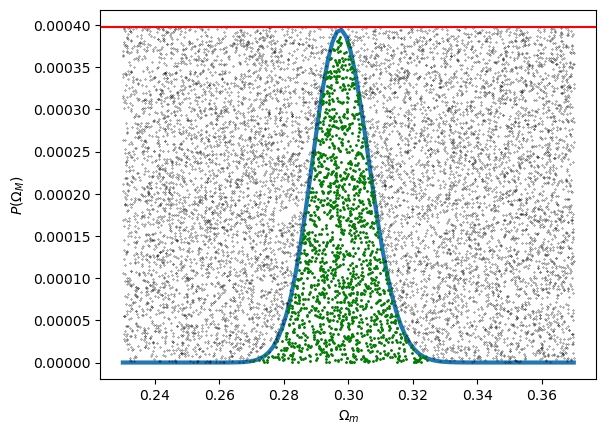

In [125]:
plt.plot(omega_m_values, posterior,lw=3)
plt.plot(omega_m_try, U*K, ".", ms="0.5", color="k")
plt.plot(omega_m_try[acc], U[acc]*K, ".", ms="2", color="g")
plt.axhline(K, color="red")
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")

plt.show()

se raddoppio k accetto più punti ma ne scarto anche di più

In [126]:
print("Omega_m : {mean:2.4f}+-{std:2.4f}".format(mean=np.mean(omega_m_try[acc]), std=np.std(omega_m_try[acc])))

Omega_m : 0.2979+-0.0088


IL VALORE DI OMEGA_M OTTENUTO CON QUESTO SECONDO METODO è DI NUOVO BUONO RISPETTO A QUELLO ATTESO!